# XLM-Roberta

for pridict the sentiment analysis for the tweets we first will use XLM-Roberta (100 languages) model fine-tuned on Arabic 3-class sentiment analysis dataset

training data is based on rating of 3 ouot of 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
import re
from datetime import datetime , date
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
from transformers import pipeline 
# this will download 2 GB
nlp = pipeline("sentiment-analysis", model='akhooli/xlm-r-large-arabic-sent')

Some weights of the model checkpoint at akhooli/xlm-r-large-arabic-sent were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# 0 mixed, 1 negative, 2 positive
print(nlp("I hate you")) # En negative
print(nlp("I love you")) # En positive
print(nlp("المنتج جيد جدا ولكنه وصل بحالة غير ممتازة")) # Ar mixed
# Ar positive
print(nlp("موقع المكان جميل جداً البناء قديم جداً ، يقدم الاكل طازج ولذيذ، معامله وخدمه ممتازه، انصح جداً بزياره المكان ، انا زبون دائم، وايضاً قريب على كنيسه المهد"))
# Ar negative
print(nlp("ببساطه اسوأ طيران في العالم , الطياره قديمه جدا جدا والطاقم والموظفين عند الوزن سيئين جدااااااااا الى ابعد الحدود + فقدو شنته السفر + تأخير طياره نصيحه من مجرب لا تحجز على الطيران الملكيه اسوأ طيران قد ركبته"))
# Ar and En positive 
print(nlp("كانت الخدمة super!"))

[{'label': 'LABEL_1', 'score': 0.749666154384613}]
[{'label': 'LABEL_2', 'score': 0.7112256288528442}]
[{'label': 'LABEL_0', 'score': 0.5494166612625122}]
[{'label': 'LABEL_2', 'score': 0.965606153011322}]
[{'label': 'LABEL_1', 'score': 0.978830873966217}]
[{'label': 'LABEL_2', 'score': 0.9744839072227478}]


In [ ]:
data = pd.read_csv('tweet.csv')

 Text tokinization

In [ ]:
# Define a list of arabic and english punctiations that we want to get rid of in our text
import string
import re 
import nltk
from nltk import sent_tokenize,word_tokenize
nltk.download("stopwords")

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    text = str(text)
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text= re.sub("[إأآا]", "ا", text)
    
    
    #remove stop words and unkwon characters
    filtered = []
    for w in text.split():
        w = re.sub(r"[0-9a-zA-Z]", "", w,flags=re.I)
        if w not in arb_stopwords:
            filtered.append(w)
    text = ' '.join(word for word in filtered)
    text = text.strip()
    return text
  
data['Tweets'] = data['Tweets'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def Sent (text):
    pred = nlp(text)
    return pred[0]['label']

def score (text):
    pred = nlp(text)
    return pred[0]['score']

In [ ]:
data['sentiment']=data['Tweets'].apply(Sent)

In [29]:
data['score']=data['Tweets'].apply(score)

In [22]:
data['sentiment'] = data['sentiment'].map({'LABEL_1': 'neg', 'LABEL_2': 'pos' , 'LABEL_0': 'mixed'})

In [30]:
data

,Tweets,created_at,sentiment,score
0,الشعب اخذ اللقاح ريت ثقافه البوس ترجع ابدا,2021-04-30 23:58:01,pos,0.512993
1,الشعب اخذ اللقاح ريت ثقافه البوس ترجع ابدا,2021-04-30 23:54:29,pos,0.512993
2,خدمه تلقيح لكبار السن المنزل اذا ماهي اليه الت...,2021-04-30 22:07:53,mixed,0.409943
3,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,2021-04-30 20:21:43,neg,0.536745
4,اللي اخد اللقاح هاي الفتره شو نوع اللي اخدتوه,2021-04-30 20:11:42,neg,0.513260
...,...,...,...,...
3080,😂😂😂😂😂,2021-04-06 03:00:58,neg,0.865395
3081,,2021-04-06 03:00:20,neg,0.393814
3082,لمن اقسم و زال يحفظ القسم لمن راى الحسين نفسه ...,2021-04-06 03:00:09,pos,0.630517
3083,’,2021-04-06 03:00:05,mixed,0.391566


In [31]:
data.to_csv('predicted_tweets_2.csv' ,index=False, encoding='utf-8' )

In [34]:
neg_tweets = data.loc[data['sentiment']=='neg' ].sort_values("score",ascending = False ,na_position ='last')['Tweets'].values[:10]
for i in range(len( neg_tweets )):
    print(i,')' , ' ' ,neg_tweets[i] )

0 )   المطعوم ببلاش وموجود جابو برا بالعضل فاشلين
1 )   كان عندي نظره بالدكتور سعد وعنجد خابت نظرتي كان اجدر شخص باستلامه منصبه للاسف كلامه داءما ١٠٠٪ وعشان
2 )   خبر زاءف وغير مدعم بالحقاءق الصحيه المثبته حول وفاه متلقي لقاح كورونا الخريف اقرا تحقق مسبار
3 )   خبر زاءف وغير مدعم بالحقاءق الصحيه المثبته حول وفاه متلقي لقاح كورونا الخريف اقرا تحقق مسبار
4 )   😭😭😭😭
5 )   يخي انا سجلت للمطعوم اول فتح الاشي اللي اله داعي تاع التسجيل المطعوم الوحيد اللي اخذته لهسا كابت
6 )   انا مش مقتنع بكل المطاعيم ومش راح اخذه
7 )   😭😭😭
8 )   يخي انا سجلت للمطعوم اول فتح الاشي اللي اله داعي تاع التسجيل المطعوم الوحيد اللي اخذته لهسا كابتن كريم دفعت فيزا مش كاش كسمحظرال٧
9 )   😵😂 اوف


In [35]:
pos_tweets = data.loc[data['sentiment']=='pos' ].sort_values("score",ascending = False ,na_position ='last')['Tweets'].values[:10]
for i in range(len( pos_tweets )):
    print(i,')' , ' ' ,pos_tweets[i] )

0 )   يب عزمتني مره كثير احلى شى صراحه كان مطعوم السلطان مره كان كلام😍😍
1 )   الحمدلله اخذت لقاح كورونا نوع فايزر احكي الصراحه تنظيم كثيير مرتب الكل ملتزم الدور جد اول باول اول مره بشوف هيك تنظيم وسرعه اقل دقيقتين جد برافو 👏👏👏
2 )   اهم شي برا عمان بطلعلك اسرع همه وصو ع مطاعيم فوق المليون جرعه
3 )   يعطيكم العافيه الموظفات والموظفين مركز المفرق الصحي الشامل معامله راءعه ومهنيه ممتازه تلقيت مطعومكورونا اهلي 😁♥️ الاردن
4 )   شي جميع المطاعيم متوفره
5 )   تلقيت الجرعه الاولى مطعوم كوفيد سينوفارم التنظيم ممتاز و التعامل راءع قبل الكادر الطبي الموجود جا
6 )   ❤️❤️ كلناالاميرحمزه
7 )   ابداع الصور كلها طاقه ايجابيه وحب♥️♥️♥️♥️♥️
8 )   عرض مميز جدا نقدمه التوت الكشميري الاحمر والابيض ذوالثمره الطويله واحجام كبيره واطوال م الى متر ومثمر سنتين والان بدايه توريق الشجر الاثمار طبعا مطعوم الكشميري اصل توت بلدي يكون اكثر مقاومه
9 )   صباح الجمال ارض الجمال فلسطين قريه بيتاقضاء نابلس صباح الصحه و السلامه و التباعد الاجتماعي و الكمامات و المطاعيم للجميع


In [33]:
sent = data.groupby('sentiment').count()
sent

,Tweets,created_at,score
sentiment,,,
mixed,269,269,269
neg,1774,1773,1774
pos,1042,1042,1042


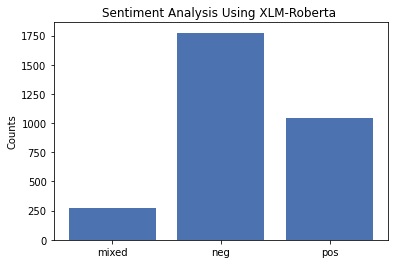

In [28]:
plt.bar(sent.index , sent.Tweets)
plt.ylabel('Counts')
plt.title('Sentiment Analysis Using XLM-Roberta ')
plt.savefig('XLM.png')
plt.show()